In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.stats.mstats import winsorize

In [88]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [90]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [94]:
df.replace('Male',0, inplace = True)
df.replace('Female',1, inplace = True)
df.replace('Other',2, inplace = True)

In [96]:
#Data Preprocessing
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [98]:
df.replace('Yes',1, inplace = True)
df.replace('No',0 , inplace = True)

In [100]:
df.replace('Urban',1, inplace = True)
df.replace('Rural',0, inplace = True)

In [102]:
df = pd.get_dummies(data=df, columns=['work_type','smoking_status'])

In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,51676,1,61.0,0,0,1,0,202.21,NaN,1,False,False,False,True,False,False,False,True,False
2,31112,0,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,60182,1,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1665,1,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False


In [106]:
df.isnull().sum()

id                                  0
gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [108]:
# delete id col => มันไม่จำเป็นต้องใช้
df = df.drop('id', axis=1)

In [110]:
bmi_missing_values = df['bmi'].isna().value_counts()
bmi_missing_values
print(f'{round(bmi_missing_values[1]/(bmi_missing_values[0] + bmi_missing_values[1])*100,3)} % of bmi data is missing')

3.933 % of bmi data is missing


9.099999999999998
47.5
21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64
bmi has 110 outliers 


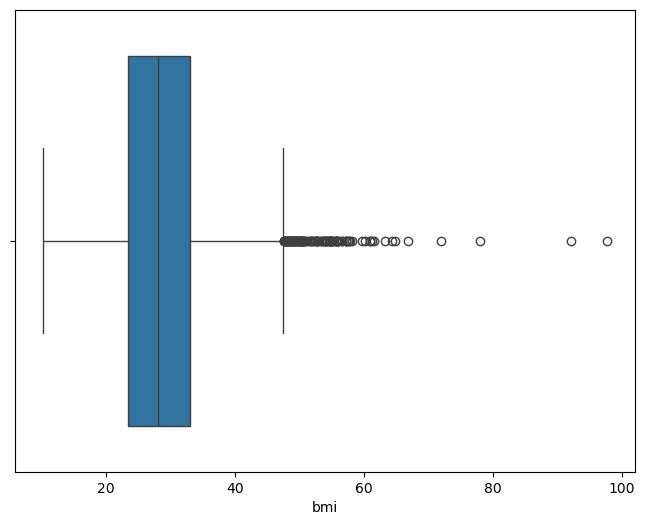

In [112]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_bmi = df[(df['bmi']<lower_bound) | (df['bmi']>upper_bound)]
if Outliers_bmi.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ bmi")
else:
    print(Outliers_bmi['bmi'])
    
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

In [114]:
# do fill null in bmi with median value
median = df.bmi.median()
df['bmi'] = df['bmi'].fillna(median)

<Axes: xlabel='bmi', ylabel='Count'>

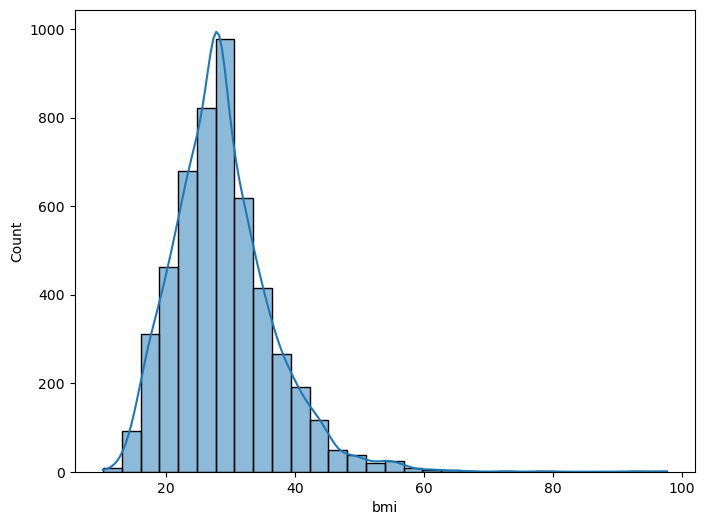

In [116]:
# สร้างฮิสโตแกรม
plt.figure(figsize=(8,6))
sns.histplot(df.bmi, bins=30, kde=True) 

In [118]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [122]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,1,61.0,0,0,1,0,202.21,28.1,1,False,False,False,True,False,False,False,True,False
2,0,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,1,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.1,0,False,False,True,False,False,False,False,True,False
5106,1,81.0,0,0,1,1,125.20,40.0,0,False,False,False,True,False,False,False,True,False
5107,1,35.0,0,0,1,0,82.99,30.6,0,False,False,False,True,False,False,False,True,False
5108,0,51.0,0,0,1,0,166.29,25.6,0,False,False,True,False,False,False,True,False,False


In [124]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['bmi'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'bmi'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['bmi'] = Outliers_cleansing

      Original  Winsorized
21        48.9        42.7
113       56.6        42.7
254       50.1        42.7
258       54.6        42.7
270       60.9        42.7
...        ...         ...
4858      47.6        42.7
4906      54.1        42.7
4952      56.6        42.7
5009      49.5        42.7
5057      47.6        42.7

[110 rows x 2 columns]


bmi doesn't have outliers


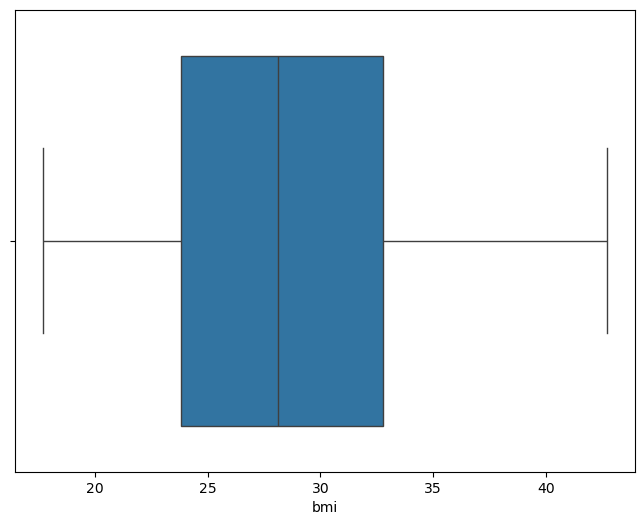

In [126]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

21.977500000000006
169.35750000000002
21      233.29
113     224.10
254     210.95
258     205.84
270     129.54
         ...  
4858    100.88
4906     70.51
4952    211.83
5009    126.85
5057     69.92
Name: avg_glucose_level, Length: 110, dtype: float64
avg_glucose_level has 874 outliers 


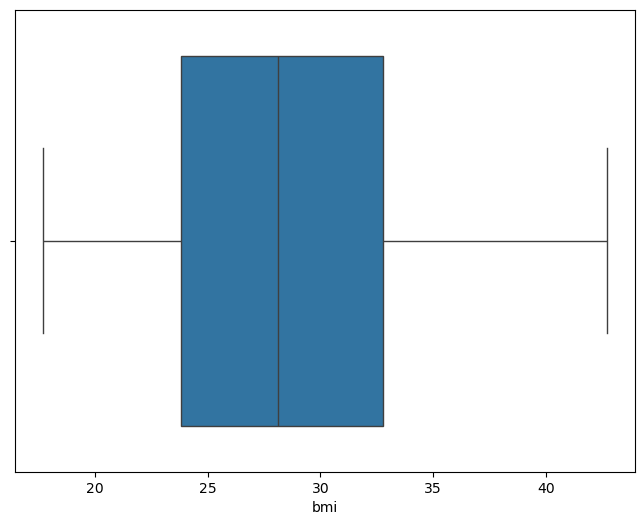

In [128]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_avg_glucose_level = df[(df['avg_glucose_level']<lower_bound) | (df['avg_glucose_level']>upper_bound)]
if Outliers_avg_glucose_level.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ avg_glucose_level")
else:
    print(Outliers_bmi['avg_glucose_level'])
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [130]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['avg_glucose_level'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'avg_glucose_level'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['avg_glucose_level'] = Outliers_cleansing

      Original  Winsorized
21      233.29      216.38
113     224.10      216.38
254     210.95      210.95
258     205.84      205.84
270     129.54      129.54
...        ...         ...
4858    100.88      100.88
4906     70.51       70.51
4952    211.83      211.83
5009    126.85      126.85
5057     69.92       69.92

[110 rows x 2 columns]


avg_glucose_level has 874 outliers 


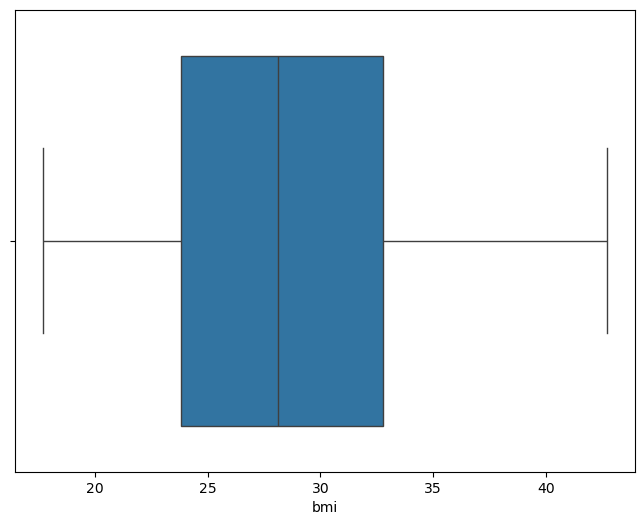

In [132]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [134]:
# X,Y Train test split
X = df.drop('stroke',axis='columns')
y = testLabels = df.stroke.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
from imblearn.combine import SMOTETomek
# ปรับสมดุลข้อมูลด้วย SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [140]:
# นิยามฟังก์ชัน evaluate_model ก่อนการเรียกใช้งาน
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    print(f"Evaluation for {model_name}")
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        # สามารถเพิ่มการคำนวณ metric ที่เกี่ยวข้อง เช่น AUC
        # ตัวอย่างเช่น print(roc_auc_score(y_test, y_prob))
        pass
# โค้ดหลักของคุณเริ่มจากตรงนี้
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1444
         1.0       0.13      0.12      0.13        89

    accuracy                           0.90      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.90      0.90      0.90      1533

Accuracy: 0.9002
Precision: 0.1279
Recall: 0.1236
AUC: 0.6182


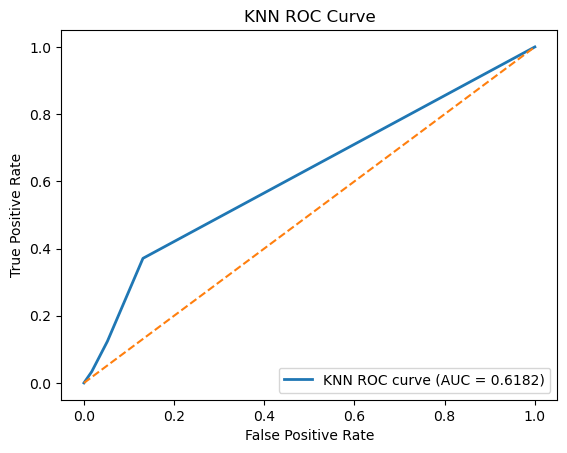

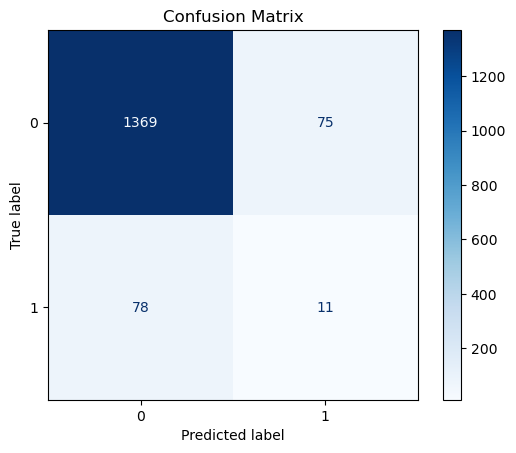

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# ปรับฟังก์ชัน evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อม Classification Report
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # คำนวณ AUC เมื่อ y_prob มีค่าไม่ใช่ None
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # แสดงผลลัพธ์
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc_score:.4f}")


# เรียกใช้ evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อมกับ Classification Report
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)  # Calculate the AUC

# Plot ROC Curve with specified colors
plt.figure()
plt.plot(fpr, tpr, color='#1f77b4', lw=2, label=f'KNN ROC curve (AUC = {roc_auc:.4f})')  # น้ำเงินเข้ม
plt.plot([0, 1], [0, 1], color='#ff7f0e', linestyle='--')  # ส้มแบบเฉพาะเจาะจง
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Generate the confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Evaluation for SVM
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1444
         1.0       0.22      0.15      0.18        89

    accuracy                           0.92      1533
   macro avg       0.58      0.56      0.57      1533
weighted avg       0.91      0.92      0.91      1533

Accuracy: 0.9204
Precision: 0.2203
Recall: 0.1461
AUC: 0.7547


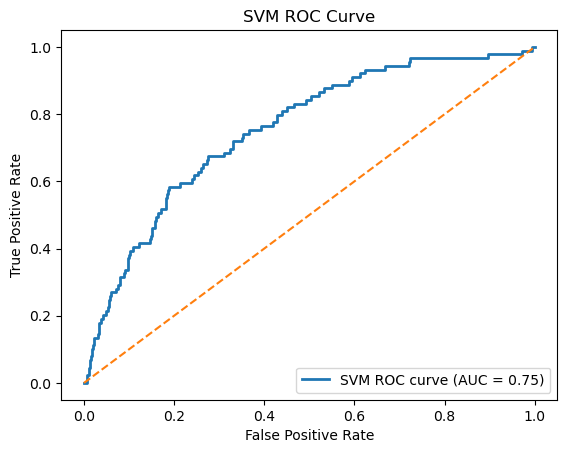

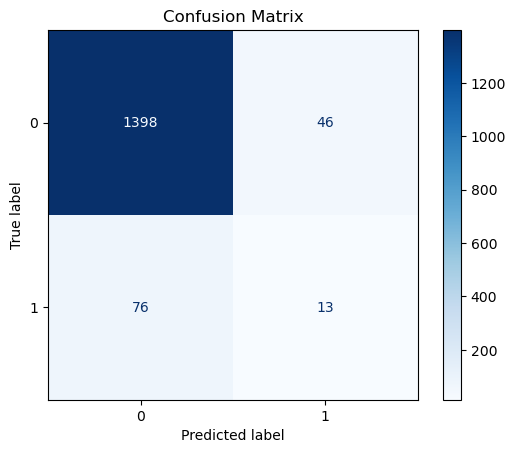

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]
# ปรับฟังก์ชัน evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อม Classification Report
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    print(f"Evaluation for {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))
    
    # คำนวณค่า Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # คำนวณ AUC เมื่อ y_prob มีค่าไม่ใช่ None
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # แสดงผลลัพธ์
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc_score:.4f}")

# เรียกใช้ evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อมกับ Classification Report
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)  # คำนวณ AUC

# พล็อตกราฟ ROC Curve ด้วยสีที่กำหนด
plt.figure()
plt.plot(fpr, tpr, color='#1f77b4', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')  # สีฟ้าเข้ม
plt.plot([0, 1], [0, 1], color='#ff7f0e', linestyle='--')  # สีส้ม
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

# สร้างและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Evaluation for NB
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40      1444
         1.0       0.08      1.00      0.14        89

    accuracy                           0.30      1533
   macro avg       0.54      0.63      0.27      1533
weighted avg       0.95      0.30      0.39      1533

Accuracy: 0.2962
Precision: 0.0762
Recall: 1.0000
AUC: 0.8219


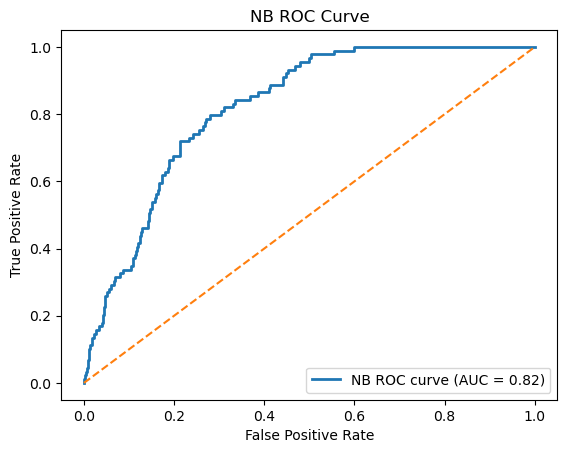

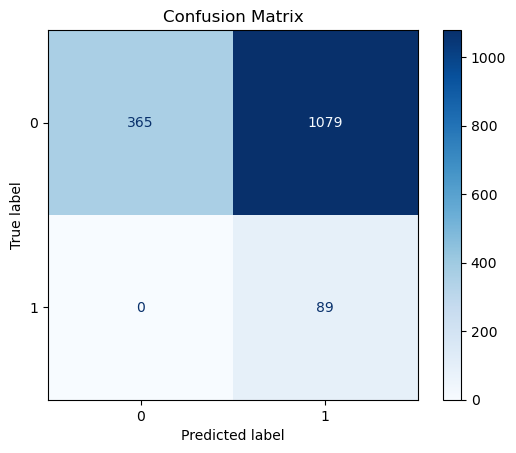

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train, y_train)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# ปรับฟังก์ชัน evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อม Classification Report
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    print(f"Evaluation for {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))
    
    # คำนวณค่า Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # คำนวณ AUC เมื่อ y_prob มีค่าไม่ใช่ None
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # แสดงผลลัพธ์
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc_score:.4f}")

# เรียกใช้ evaluate_model เพื่อแสดงค่า Accuracy, Precision, Recall, และ AUC พร้อมกับ Classification Report
evaluate_model("NB", y_test, y_pred_nb, y_prob_nb)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)  # คำนวณ AUC

# พล็อตกราฟ ROC Curve ด้วยสีที่กำหนด
plt.figure()
plt.plot(fpr, tpr, color='#1f77b4', lw=2, label=f'NB ROC curve (AUC = {roc_auc:.2f})')  # สีฟ้าเข้ม
plt.plot([0, 1], [0, 1], color='#ff7f0e', linestyle='--')  # สีส้ม
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB ROC Curve')
plt.legend(loc="lower right")
plt.show()

# สร้างและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()